In [2]:
import requests
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from cycler import cycler

In [3]:
# Define the URL and query parameters
url = "https://publicationtool.jao.eu/core/api/data/scheduledExchanges"
params = {
    "FromUtc": "2025-01-09T23:00:00.000Z",
    "ToUtc": "2025-01-10T23:00:00.000Z"
}

try:
    # Make the GET request
    response = requests.get(url, params=params, verify=False)
    
    # Check if the request was successful
    response.raise_for_status()  # Raises an HTTPError for bad responses (4xx and 5xx)
    
    # Parse and print the JSON response
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

# Extract the 'data' list
data_list = data['data']

# Create a DataFrame
df = pd.DataFrame(data_list)

c:\Users\rjaka\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'publicationtool.jao.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
df['dateTimeUtc'] = pd.to_datetime(df['dateTimeUtc'], utc=True)
# Convert to Ljubljana time zone (Europe/Ljubljana)
ljubljana_tz = pytz.timezone('Europe/Ljubljana')
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_convert(ljubljana_tz)
df['dateTimeUtc'] = df['dateTimeUtc'].dt.tz_localize(None)
df.head(1)

,id,dateTimeUtc,border_AT_CZ,border_AT_DE,border_AT_HU,border_AT_SI,border_BE_DE,border_BE_FR,border_BE_NL,border_CZ_AT,...,border_SI_AT,border_SI_HR,border_SI_HU,border_SK_CZ,border_SK_HU,border_SK_PL,border_FR_ES,border_ES_FR,border_DK1_DE,border_DE_DK1
0,32754,2025-01-10,0.0,0.0,799.8,872.6,0.0,75.5,0.0,2129.4,...,0.0,129.9,0.0,0.0,2310.4,0.0,3330.0,0.0,143.3,0.0


In [13]:
# Filter columns starting with 'border_SI_'
filtered_columns = [col for col in df.columns if col.startswith('border_SI_')]

# Create a new DataFrame with only the filtered columns
df_slo = df[filtered_columns]
# Dictionary to map country codes to country names
country_mapping = {
    'AT': 'Avstrija',
    'BE': 'Belgija',
    'CZ': 'Češka',
    'DE': 'Nemčija',
    'FR': 'Francija',
    'HR': 'Hrvaška',
    'HU': 'Madžarska',
    'NL': 'Nizozemska',
    'PL': 'Poljska',
    'RO': 'Romunija',
    'SI': 'Slovenija',
    'SK': 'Slovaška',
    'IT': 'Italija'
}

# Function to map country code to full name
def map_country_name(col_name):
    # Extract the country code (last two characters)
    country_code = col_name.split('_')[2]
    # Map the country code to the full country name
    country_name = country_mapping.get(country_code, country_code)  # Default to country code if not found
    return f"{country_name}"

# Change column names by applying the mapping
df_slo.columns = [map_country_name(col) if 'border_' in col else col for col in df_slo.columns]
df_slo = df_slo.round(0).astype(int)
df_slo.head(1)
# df_slo.head(1)


,Avstrija,Hrvaška,Madžarska
0,0,130,0


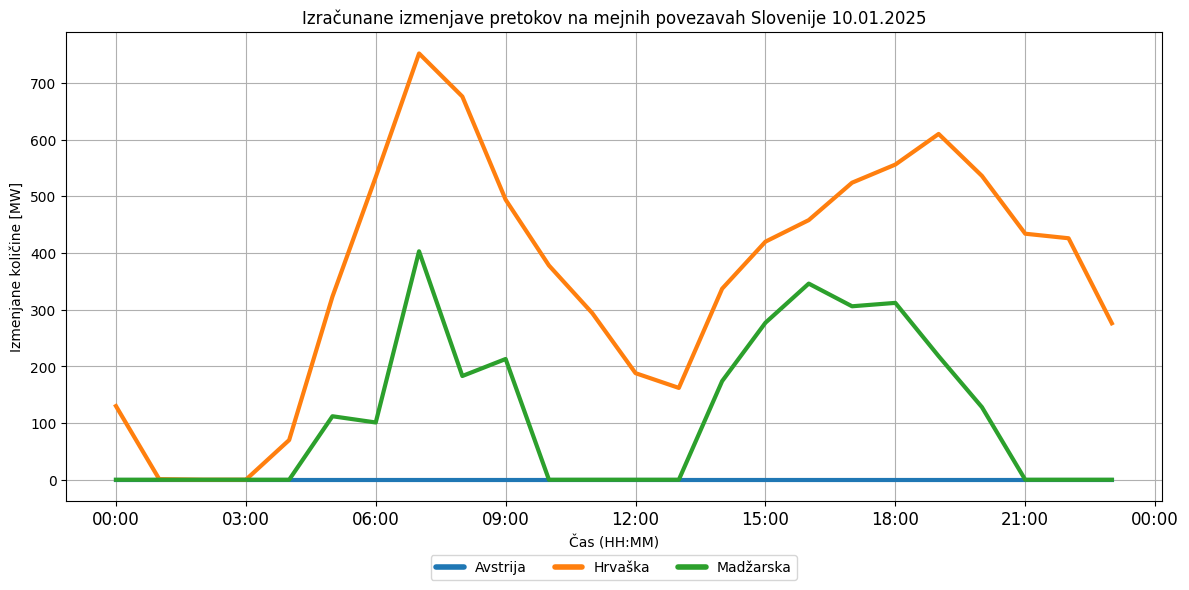

In [14]:

date_str = df['dateTimeUtc'].iloc[0].strftime('%d.%m.%Y')
# Set the plot title with the actual date
title = f'Izračunane izmenjave pretokov na mejnih povezavah Slovenije {date_str}'

# Create a custom color cycle
color_cycle = cycler('color', plt.cm.tab10.colors)  # Using the tab20 color map

# Apply the color cycle to the current plot
plt.rcParams['axes.prop_cycle'] = color_cycle

# Plotting all columns in the df_max DataFrame
plt.figure(figsize=(12, 6))

# Set the line width to 2 (or any value you prefer)
line_width = 3  # You can increase this value to make the lines thicker

for column in df_slo.columns:
    plt.plot(df['dateTimeUtc'], df_slo[column], label=column, linewidth=line_width, zorder=3)  # Set higher zorder for lines

# Set the plot title dynamically
plt.title(title)

# Set the x-axis and y-axis labels
plt.xlabel('Čas (HH:MM)')
plt.ylabel('Izmenjane količine [MW]')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Format x-axis to show only hours and minutes (HH:MM)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Enable grid and set a lower zorder to place it behind the lines
plt.grid(True, zorder=0)  # Set lower zorder for grid

# Change x-axis tick size
plt.tick_params(axis='x', labelsize=12)  # Adjust labelsize as needed (e.g., 12)

# Get the current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Create custom handles with thicker lines for the legend
custom_handles = [Line2D([0], [0], color=handle.get_color(), lw=4, solid_capstyle='round') for handle in handles]

# Display the legend with custom handles and labels
plt.legend(
    handles=custom_handles,
    labels=labels,
    fontsize=10,        # Optional: Adjust the font size for the legend labels
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=6  # You can change this number to adjust the number of columns in the legend
)

# Adjust layout for a clean plot
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
# Filter columns starting with 'border_SI_'
df_CORE = df[df.columns[df.columns.str.endswith('SI')]]

# Create a new DataFrame with only the filtered columns
df_CORE = df[filtered_columns]
# Dictionary to map country codes to country names
country_mapping = {
    'AT': 'Avstrija',
    'BE': 'Belgija',
    'CZ': 'Češka',
    'DE': 'Nemčija',
    'FR': 'Francija',
    'HR': 'Hrvaška',
    'HU': 'Madžarska',
    'NL': 'Nizozemska',
    'PL': 'Poljska',
    'RO': 'Romunija',
    'SI': 'Slovenija',
    'SK': 'Slovaška'
}

# Function to map country code to full name
def map_country_name(col_name):
    # Extract the country code (last two characters)
    country_code = col_name.split('_')[2]
    
    # Map the country code to the full country name
    country_name = country_mapping.get(country_code, country_code)  # Default to country code if not found
    return f"{country_name}"

# Change column names by applying the mapping
df_CORE.columns = [map_country_name(col) if 'border_' in col else col for col in df_CORE.columns]
df_CORE = df_CORE.round(0).astype(int)
df_CORE.head(1)


,Avstrija,Hrvaška,Madžarska
0,0,130,0


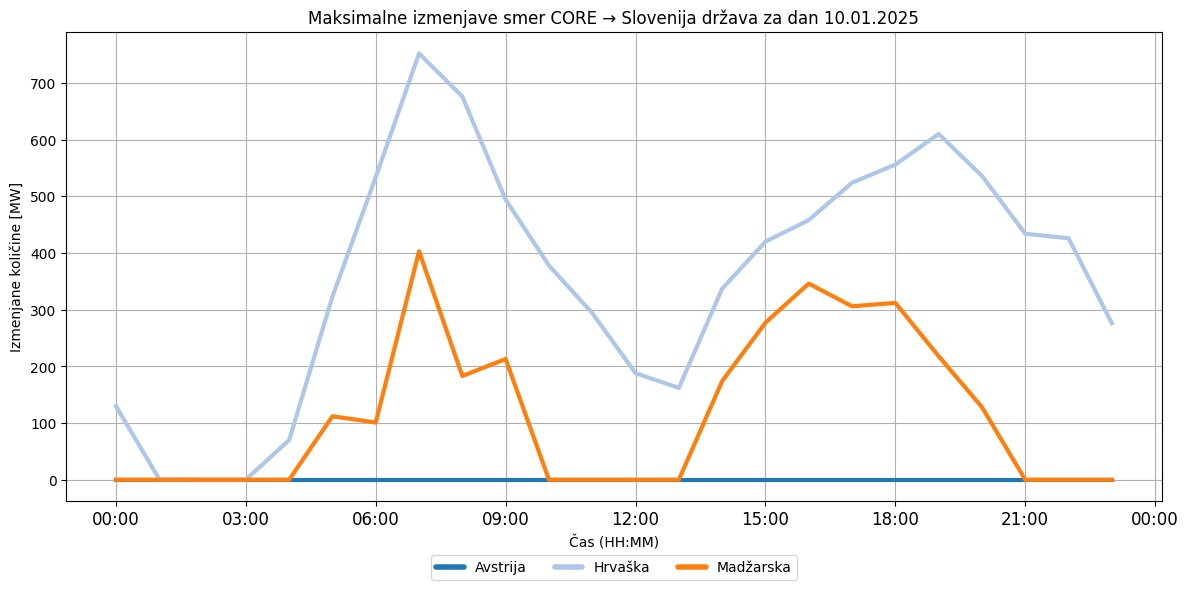

In [18]:
# Extract the date from the first entry in 'dateTimeUtc' column and format it
df['dateTimeUtc'] = pd.to_datetime(df['dateTimeUtc'])
date_str = df['dateTimeUtc'].iloc[0].strftime('%d.%m.%Y')

# Set the plot title with the actual date
title = f'Maksimalne izmenjave smer CORE → Slovenija država za dan {date_str}'

# Create a custom color cycle
color_cycle = cycler('color', plt.cm.tab20.colors)  # Using the tab20 color map

# Apply the color cycle to the current plot
plt.rcParams['axes.prop_cycle'] = color_cycle

# Plotting all columns in the df_max DataFrame
plt.figure(figsize=(12, 6))

# Set the line width to 2 (or any value you prefer)
line_width = 3  # You can increase this value to make the lines thicker

for column in df_CORE.columns:
    plt.plot(df['dateTimeUtc'], df_CORE[column], label=column, linewidth=line_width, zorder=3)  # Set higher zorder for lines

# Set the plot title dynamically
plt.title(title)

# Set the x-axis and y-axis labels
plt.xlabel('Čas (HH:MM)')
plt.ylabel('Izmenjane količine [MW]')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Format x-axis to show only hours and minutes (HH:MM)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Enable grid and set a lower zorder to place it behind the lines
plt.grid(True, zorder=0)  # Set lower zorder for grid

# Change x-axis tick size
plt.tick_params(axis='x', labelsize=12)  # Adjust labelsize as needed (e.g., 12)

# Get the current handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Create custom handles with thicker lines for the legend
custom_handles = [Line2D([0], [0], color=handle.get_color(), lw=4, solid_capstyle='round') for handle in handles]

# Display the legend with custom handles and labels
plt.legend(
    handles=custom_handles,
    labels=labels,
    fontsize=10,        # Optional: Adjust the font size for the legend labels
    loc='upper center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=6  # You can change this number to adjust the number of columns in the legend
)

# Adjust layout for a clean plot
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
# Filter columns starting with 'border_SI_'
filtered_columns = [col for col in df.columns if 'SI' in col]

# Create a new DataFrame with only the filtered columns
df_slo = df[filtered_columns]
# Dictionary to map country codes to country names
country_mapping = {
    'AT': 'Avstrija',
    'BE': 'Belgija',
    'CZ': 'Češka',
    'DE': 'Nemčija',
    'FR': 'Francija',
    'HR': 'Hrvaška',
    'HU': 'Madžarska',
    'NL': 'Nizozemska',
    'PL': 'Poljska',
    'RO': 'Romunija',
    'SI': 'Slovenija',
    'SK': 'Slovaška',
    'IT': 'Italija'
}

# Function to map country code to full name
def map_country_name(col_name):
    # Extract the country code (last two characters)
    country_code = col_name.split('_')[2]
    # Map the country code to the full country name
    country_name = country_mapping.get(country_code, country_code)  # Default to country code if not found
    return f"{country_name}"

# Change column names by applying the mapping
df_slo.columns = [map_country_name(col) if 'border_' in col else col for col in df_slo.columns]
df_slo = df_slo.round(0).astype(int)
df_slo.head(1)
# df_slo.head(1)


,Slovenija,Slovenija,Slovenija,Avstrija,Hrvaška,Madžarska
0,873,0,73,0,130,0


In [21]:
df_CORE

,Avstrija,Hrvaška,Madžarska
0,0,130,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,70,0
5,0,323,112
6,0,534,101
7,0,752,403
8,0,676,183
9,0,494,213
